# This notebook contains tests for beijbom_lib

## Testing cycle_runs

In [8]:
run_params = []
run_params.append({'workdir':'/runs/demo/experiment1'})
run_params.append({'workdir':'/runs/demo/experiment2'})

test_params = []
test_params.append({'scorelayer':'fc8_ifcb'})
test_params.append({'scorelayer':'fc8_ifcb'})


In [4]:
bct.cycle_runs_debug(run_params, test_params)

Running tests...
Running /runs/demo/experiment1 from 70 to 74 itts.
Running from iter 70.
Classifying ./../vallist.txt from /runs/demo/experiment1/net.prototxt using snapshot_iter_74.caffemodel with bs:128, and 5 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment1/testnet.prototxt using snapshot_iter_74.caffemodel with bs:128, and 5 total instances.


Running /runs/demo/experiment2 from 46 to 50 itts.
Running from iter 46.
Classifying ./../vallist2.txt from /runs/demo/experiment2/net.prototxt using snapshot_iter_50.caffemodel with bs:128, and 5 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment2/testnet.prototxt using snapshot_iter_50.caffemodel with bs:128, and 5 total instances.


Run test OK. Cleaning up.


In [9]:
reload(bct)
bct.cycle_runs(run_params, test_params, [11, 11], 1)

Running /runs/demo/experiment1 from 0 to 11 itts.
Fine tuning from /runs/demo/experiment1/weights.caffemodel.
Classifying ./../vallist.txt from /runs/demo/experiment1/net.prototxt using snapshot_iter_11.caffemodel with bs:128, and 3 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment1/testnet.prototxt using snapshot_iter_11.caffemodel with bs:128, and 30 total instances.


Running /runs/demo/experiment2 from 0 to 11 itts.
Fine tuning from /runs/demo/experiment2/weights.caffemodel.
Classifying ./../vallist2.txt from /runs/demo/experiment2/net.prototxt using snapshot_iter_11.caffemodel with bs:128, and 3 total instances.


Classifying ./../testlist.txt from /runs/demo/experiment2/testnet.prototxt using snapshot_iter_11.caffemodel with bs:128, and 30 total instances.


## Testing bct.classify_imlist

In [35]:
net = bct.load_model('/runs/ifcb_aq/alexnet_basic_lr2/', 'snapshot_iter_20000.caffemodel')

In [11]:
transformer = bct.Transformer()
transformer.set_mean([179, 179, 179])
transformer.set_scale(0.00390625)

asterionellopsis


8.4198008

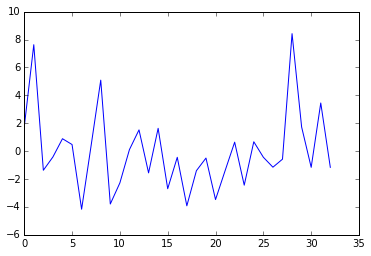

In [52]:
%matplotlib inline

im = bmt.crop_center(np.asarray(Image.open('/runs/ifcb_aq/medianpad240/asterionellopsis/IFCB1_2009_001_001602_00899.png')), 226)
(est, scores) = bct.classify_imlist([im], net, transformer, 1, 'fc8_ifcb', startlayer = 'conv1')
labelset = pickle.load(open('/data/ifcb/labelset_1000.p', 'rb'))
print labelset[est[0]]
scores[0][labelset.index('asterionellopsis')]
plt.plot(scores[0])
scores[0][28]

## Testing beijbom_caffe_data_layers

In [2]:
from beijbom_caffe_data_layers import RandomPointDataLayer
import json

imlist = ['flowers.jpg', 'penguins.jpg']
anndata = []
anndata.append((100, 200, 0))
anndata.append((600, 800, 1))
height_cm = 100
imdict = {}
imdict['flowers.jpg'] = (anndata, height_cm)
anndata = []
anndata.append((200, 200, 0))
anndata.append((400, 600, 1))
imdict['penguins.jpg'] = (anndata, height_cm)

with open('./imdict.txt', 'w') as outfile:
    json.dump(imdict, outfile)
    
with open('./imlist.txt', 'w') as outfile:
    for im in imlist:
        outfile.write(im + '\n')
                      
param_str = "{'imlistfile':'imlist.txt', 'imdictfile':'imdict.txt', 'batch_size':1, 'imgs_per_batch':1, 'crop_size':500, 'im_mean':[100, 100, 100], 'im_scale':0.004}"
params = eval(param_str)
print params

{'im_mean': [100, 100, 100], 'imdictfile': 'imdict.txt', 'batch_size': 1, 'imlistfile': 'imlist.txt', 'im_scale': 0.004, 'imgs_per_batch': 1, 'crop_size': 500}


In [2]:
import beijbom_caffe_data_layers
reload(beijbom_caffe_data_layers)
import caffe
caffe.set_device(0)
caffe.set_mode_gpu()
net = caffe.Net('./debug_static_data/debugnet.prototxt', '/runs/catlin_aq/adapt17001_conv1-5/weights.caffemodel', caffe.TRAIN)

Setting up RandomPointDataLayer with batch size:5
The mighty PatchBatchAdvancer is initialized with 2 images, 2 imgs per batch, and 227x227 pixel patches
The mighty PatchBatchAdvancer is producing patches: [3 from flowers.jpg(id 0), 2 from penguins.jpg(id 1)]


The mighty PatchBatchAdvancer finished an epoch. Shuffling image list
The mighty PatchBatchAdvancer is producing patches: [3 from penguins.jpg, 2 from flowers.jpg]


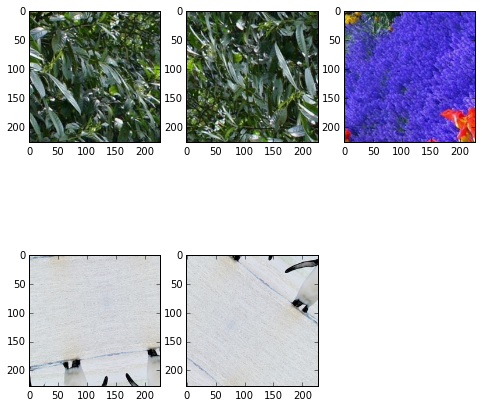

In [72]:
net.forward()
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(transformer.deprocess(net.blobs['data'].data[i]))

In [77]:
a = range(5)


IndexError: list index out of range

In [76]:
range(2,2+2)

[2, 3]

In [3]:
import beijbom_caffe_data_layers
reload(beijbom_caffe_data_layers)
import beijbom_caffe_tools
from threading import Thread

transformer = beijbom_caffe_data_layers.TransformerWrapper()
transformer.set_mean(params['im_mean'])
transformer.set_scale(params['im_scale'])
results = {}
print imlist
pba = beijbom_caffe_data_layers.PatchBatchAdvancer(results, 3, imlist, imdict, 3, 500, transformer)


['flowers.jpg', 'penguins.jpg']
The mighty PatchBatchAdvancer is initialized with 2 images, 3 imgs per batch, and 500x500 pixel patches


Exception in thread Thread-3:
Traceback (most recent call last):
  File "/home/beijbom/anaconda3/envs/python2/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/home/beijbom/anaconda3/envs/python2/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "beijbom_caffe_data_layers.py", line 136, in __call__
    im = np.asarray(Image.open(imname))
  File "/home/beijbom/anaconda3/envs/python2/lib/python2.7/site-packages/PIL/Image.py", line 2248, in open
    fp = builtins.open(fp, "rb")
IOError: [Errno 2] No such file or directory: 'flowers.jpg'



In [4]:
thread = Thread(target = pba)
thread.start()
thread.join()


The mighty PatchBatchAdvancer finished an epoch. Shuffling image list
The mighty PatchBatchAdvancer is producing patches: [1 from flowers.jpg(id 0), 1 from penguins.jpg(id 1)]


Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/beijbom/anaconda3/envs/python2/lib/python2.7/threading.py", line 810, in __bootstrap_inner
    self.run()
  File "/home/beijbom/anaconda3/envs/python2/lib/python2.7/threading.py", line 763, in run
    self.__target(*self.__args, **self.__kwargs)
  File "beijbom_caffe_data_layers.py", line 136, in __call__
    im = np.asarray(Image.open(imname))
  File "/home/beijbom/anaconda3/envs/python2/lib/python2.7/site-packages/PIL/Image.py", line 2248, in open
    fp = builtins.open(fp, "rb")
IOError: [Errno 2] No such file or directory: 'flowers.jpg'



IndexError: list index out of range

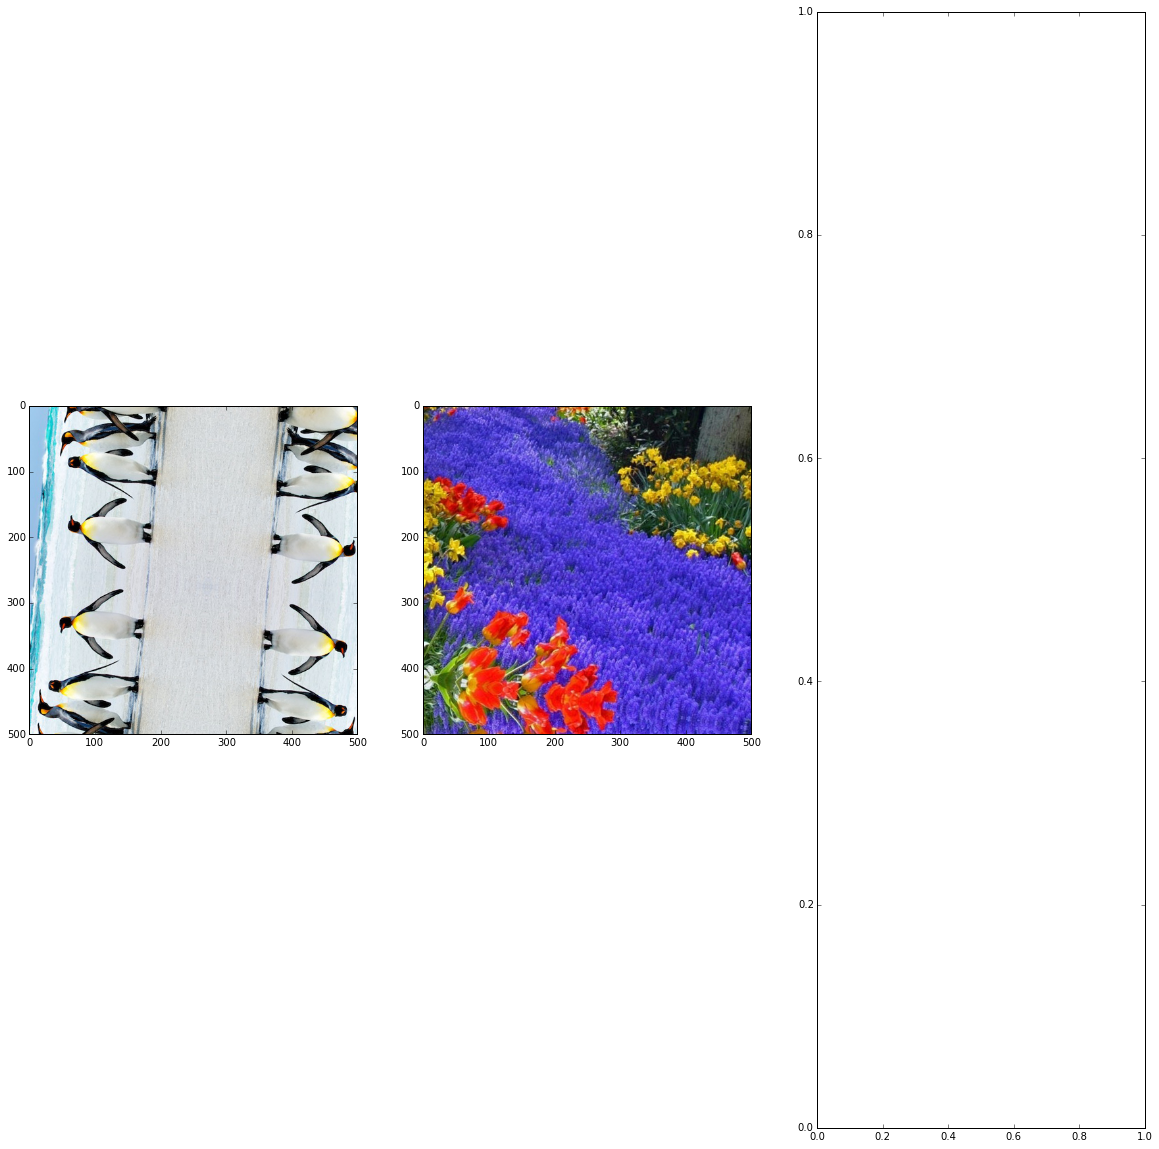

In [36]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,20)
plt.subplot(1, 3, 1)
plt.imshow(transformer.deprocess(results['data'][0]))
plt.subplot(1, 3, 2)
plt.imshow(transformer.deprocess(results['data'][1]))
plt.subplot(1, 3, 3)
plt.imshow(transformer.deprocess(results['data'][2]))

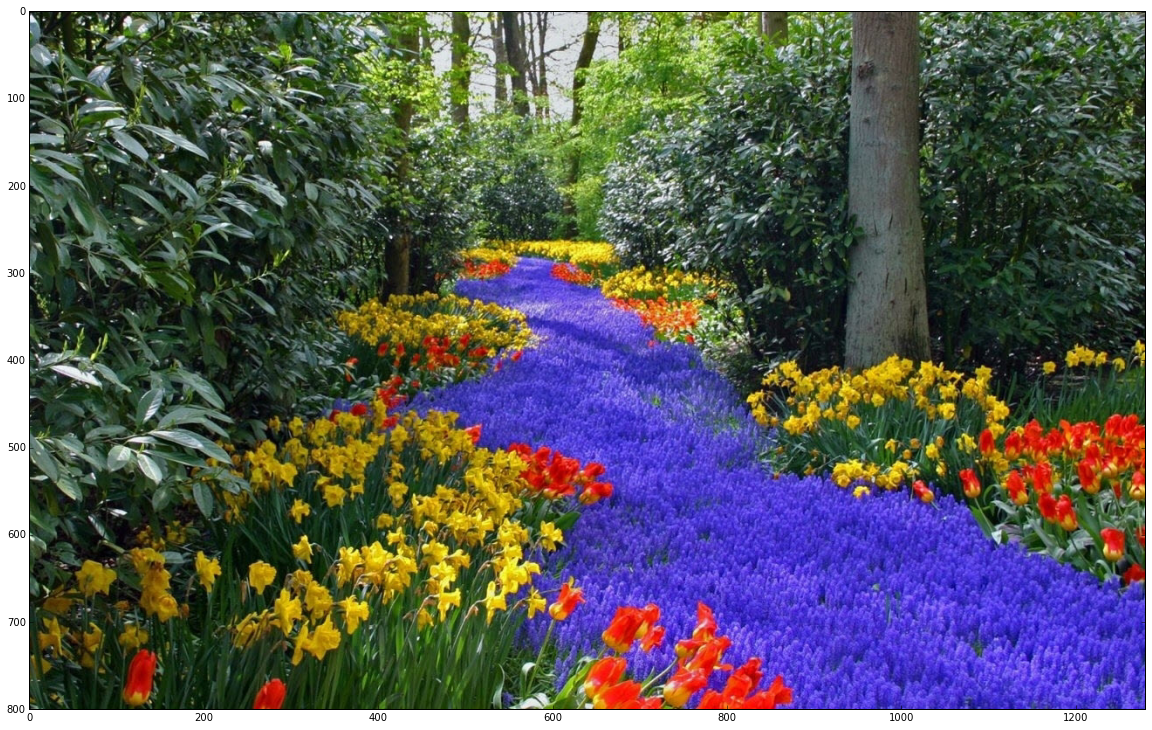

In [22]:
from PIL import Image
im = Image.open(imlist[0])
plt.imshow(im)

In [13]:
results['data'][0]

array([[[  1.57818765e+11,   1.34381273e+11,   1.10943748e+11, ...,
           6.79750205e+10,   7.57875180e+10,   9.53187451e+10],
        [  8.75062559e+10,   8.36000154e+10,   7.18812692e+10, ...,
           1.07037499e+11,   1.03131251e+11,   1.18756254e+11],
        [  9.38127462e+09,   3.28187699e+10,   8.75062559e+10, ...,
           1.38287514e+11,   1.22662494e+11,   1.26568743e+11],
        ..., 
        [  1.38287514e+11,   1.65631263e+11,   1.73443744e+11, ...,
           1.22662494e+11,   2.55474975e+11,   5.91412462e+11],
        [  1.46100044e+11,   1.77349984e+11,   1.77349984e+11, ...,
           1.07037499e+11,   1.69537503e+11,   3.02350008e+11],
        [  1.57818765e+11,   1.96881236e+11,   1.96881236e+11, ...,
           9.14124964e+10,   9.53187451e+10,   9.53187451e+10]],

       [[  1.92974979e+11,   1.61725022e+11,   1.22662494e+11, ...,
           1.34381273e+11,   1.53912525e+11,   1.77349984e+11],
        [  1.14849997e+11,   9.92249938e+10,   7.96937667e+1

0.007314 seconds to rotate image.
0.018535 seconds to rotate image.
0.313001 seconds to rotate image.


0

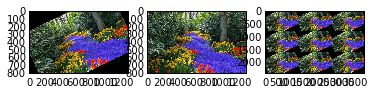

In [7]:
%matplotlib inline
import skimage.io
from scipy import ndimage
import time
from PIL import Image
PILim = Image.open('./debug_static_data/' + imlist[0])
npim = np.asarray(Image.open('./debug_static_data/' + imlist[0]))
scipyim = np.asarray(skimage.io.imread('./debug_static_data/' + imlist[0]))

t0 = time.clock()
ccc = Image.fromarray(npim)
ccc = ccc.rotate(26)
ccc = np.asarray(ccc)
print time.clock() - t0, 'seconds to rotate image.'

t0 = time.clock()
PILimr = PILim.rotate(26)
print time.clock() - t0, 'seconds to rotate image.'


t0 = time.clock()
npimr = scipy.ndimage.interpolation.rotate(npim, 26, reshape=False)
print time.clock() - t0, 'seconds to rotate image.'


plt.subplot(1, 3, 1)
plt.imshow(npimr)
plt.subplot(1, 3, 2)
plt.imshow(scipyim)
plt.subplot(1, 3, 3)
plt.imshow(np.tile(npimr, (3, 3, 1)))

np.min(scipyim)

TypeError: Invalid dimensions for image data

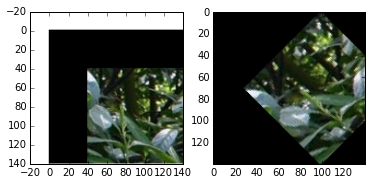

In [5]:
%matplotlib inline
#plt.imshow(np.tile(imnp, (3, 3, 1), mirror= True))

im2 = PILim.crop((-40, -40, 100, 100))

plt.subplot(1,2,1)
plt.imshow(im2.rotate(0))
plt.plot(70, 70, 'rx')
plt.subplot(1,2,2)
plt.imshow(im2.rotate(45))


In [13]:
im22 = np.pad(npim, ((400, 400),(400, 400),(0,0)), mode='reflect')
im22.shape

(1600, 2080, 3)

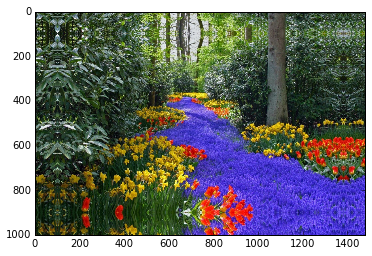

In [12]:
plt.imshow(im22)
